### Contagem das palavras mais usadas no Plano de governo - Rede

#### Importacao de bibliotecas

In [1]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Link do plano de governo

- [Plano de governo](https://marinasilva.org.br/wp-content/uploads/2018/08/MS18-Diretrizes-Marina-Edu.pdf)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [2]:
with open('text/plano_governo_rede.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [3]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [4]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [5]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [6]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [7]:
# checando a conversao
big_string[0:1000]

' marina silva presidente eduardo jorge vice brasil justo ético próspero e sustentável coligação unidos para transformar o brasil  rede  pv 1  \x0cbrasil justo ético próspero e sustentável vivemos um momento de desesperança profunda com a política e os políticos interesses privilégios e corrupção sabotam a confiança dos brasileiros na possibilidade de um país justo ético próspero e sustentável ao mesmo tempo estamos nos aproximando das eleições quando teremos a oportunidade de tomar uma decisão muito importante para o nosso futuro reafirmando a democracia diante das incertezas que temos dos problemas que enfrentamos e dos discursos extremistas que surgem para nos dividir nos próximos meses a palavra mudar será usada à exaustão inclusive por muitos que foram protagonistas do passado e que criaram os problemas do presente e agora querem convencer o eleitor de que serão capazes de comandar a difícil travessia que o brasil precisa fazer não serão é o momento de dar um basta na velha políti

In [8]:
# comprimento da string
len(big_string)

101190

In [9]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [10]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [11]:
# numero de stopwords
len(stop_words)

203

In [12]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')

In [13]:
# tamanho do texto apos limpeza
len(full_text)

80967

In [14]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

20223

In [15]:
# transformando a string em lista
full_text = [full_text]

In [16]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [17]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [18]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:29]

[('brasil', 66),
 ('políticas', 57),
 ('política', 48),
 ('saúde', 42),
 ('país', 38),
 ('desenvolvimento', 37),
 ('nacional', 36),
 ('educação', 34),
 ('acesso', 34),
 ('municípios', 32),
 ('serviços', 32),
 ('meio', 32),
 ('qualidade', 31),
 ('recursos', 31),
 ('forma', 31),
 ('promoveremos', 30),
 ('social', 29),
 ('ser', 28),
 ('uso', 27),
 ('economia', 27),
 ('sistema', 27),
 ('população', 26),
 ('redução', 26),
 ('vida', 25),
 ('sociedade', 25),
 ('sobre', 25),
 ('fundamental', 25),
 ('brasileira', 24),
 ('pessoas', 24)]

In [19]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [20]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)
df_r = df_r.sort_values(['frequencia'], ascending=0)
df_r.head()

,frequencia,palavra
0,66,brasil
1,57,políticas
2,48,política
3,42,saúde
4,38,país


In [21]:
#df_r.frequencia = df_r.frequencia/df_r.loc[0, 'frequencia']

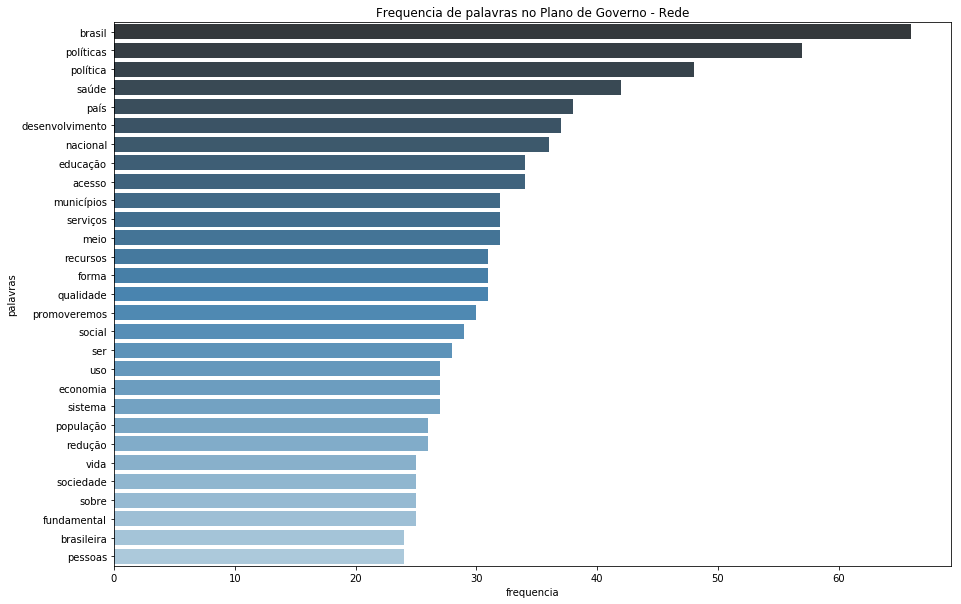

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(df_r.frequencia, df_r.palavra, palette="Blues_d")
plt.title("Frequencia de palavras no Plano de Governo - Rede")
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()


In [23]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('brasil', 66),
 ('políticas', 57),
 ('política', 48),
 ('saúde', 42),
 ('país', 38),
 ('desenvolvimento', 37),
 ('nacional', 36),
 ('educação', 34),
 ('acesso', 34),
 ('municípios', 32),
 ('serviços', 32),
 ('meio', 32),
 ('qualidade', 31),
 ('recursos', 31),
 ('forma', 31),
 ('promoveremos', 30),
 ('social', 29),
 ('ser', 28),
 ('uso', 27),
 ('economia', 27),
 ('sistema', 27),
 ('população', 26),
 ('redução', 26),
 ('vida', 25),
 ('sociedade', 25),
 ('sobre', 25),
 ('fundamental', 25),
 ('brasileira', 24),
 ('pessoas', 24),
 ('anos', 24),
 ('gestão', 23),
 ('produção', 23),
 ('todos', 22),
 ('ainda', 22),
 ('governo', 22),
 ('apoio', 22),
 ('promover', 22),
 ('setor', 22),
 ('segurança', 21),
 ('públicas', 21),
 ('estados', 21),
 ('públicos', 21),
 ('ampliação', 21),
 ('trabalho', 21),
 ('garantir', 21),
 ('cultura', 20),
 ('cada', 19),
 ('direitos', 19),
 ('maior', 18),
 ('oportunidades', 18),
 ('inovação', 18),
 ('criação', 18),
 ('investimentos', 18),
 ('sustentável', 17),
 ('pro

In [24]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['brasil',
 'políticas',
 'política',
 'saúde',
 'país',
 'desenvolvimento',
 'nacional',
 'educação',
 'acesso']

In [25]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                if text[j+1] == '':
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+2]
                else:
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [27]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=3:
        print(key, value)

plano nacional educação 3
base nacional comum 3
saúde qualidade todos 3
parceria estados municípios 3
uso novas tecnologias 5
políticas prevenção combate 3
povos comunidades tradicionais 3
ciência tecnologia inovação 5
